# DATA GATHERING AND EXPLORATION

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [83]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [84]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [85]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# DATA VISUALIATION AND MODEL SELECTION

<Axes: >

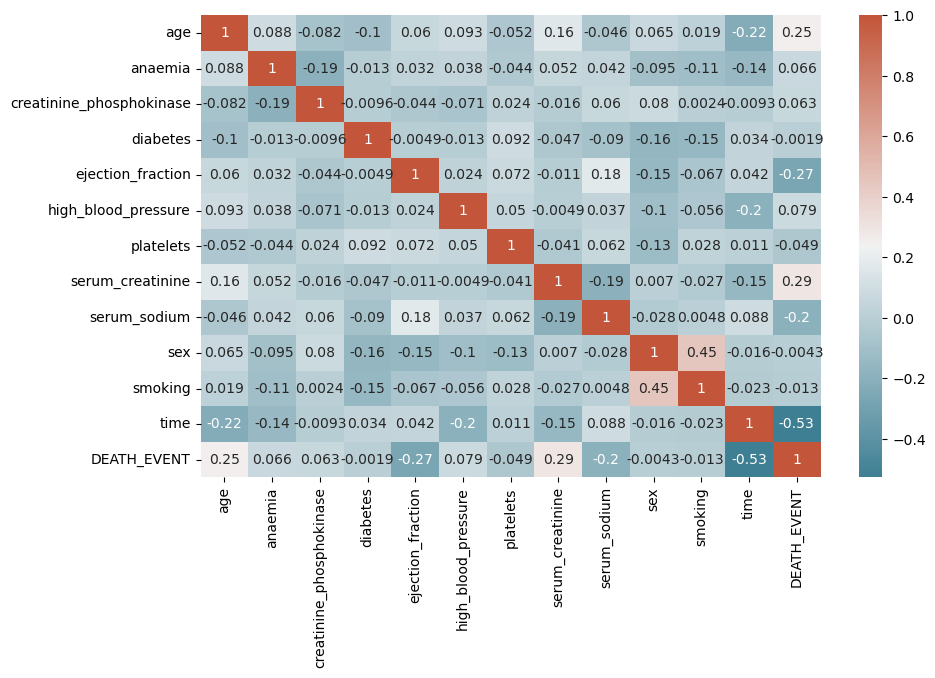

In [87]:
# calculate correlation matrix
corr = df.corr()
#plot heat map
plt.figure(figsize = (10,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: >

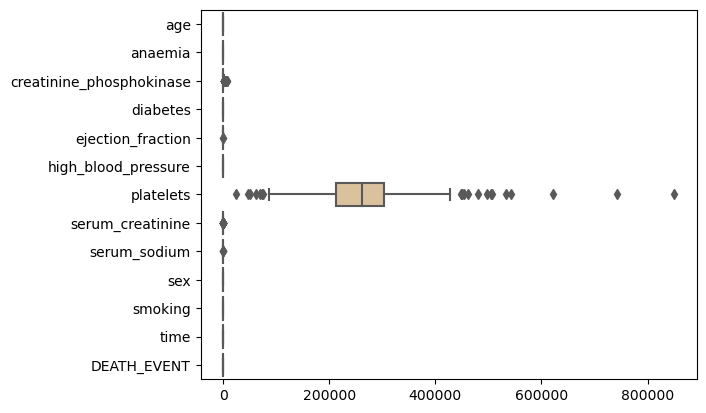

In [88]:
# Check for outliers
ax = sns.boxplot(data=df, orient="h", palette="Set2")
ax

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'sizes'
  cset = contour_func(


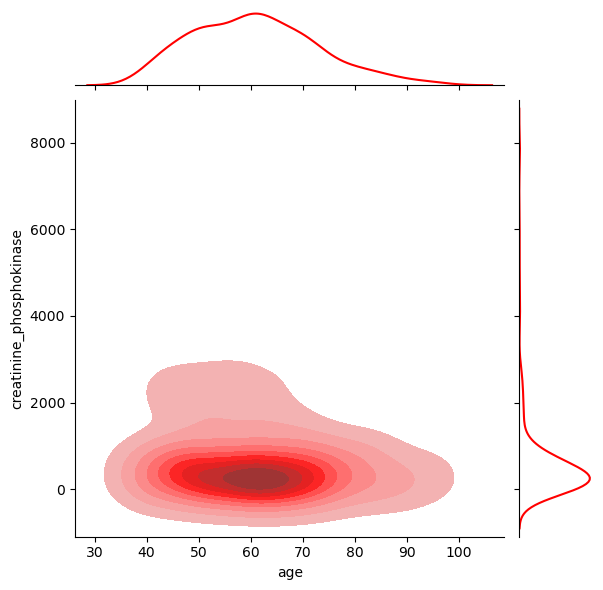

In [89]:
sns.jointplot(x="age", y="creatinine_phosphokinase", data=df, color='red', space=0.2, shade=True, shade_lowest=False, kind="kde", sizes=(20,0))

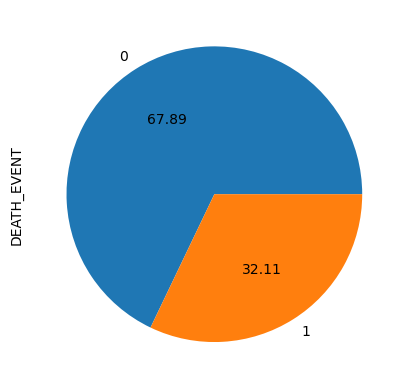

In [90]:
df['DEATH_EVENT'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

# MODEL TRAINING AND TESTING

In [91]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'],test_size=0.2,random_state=70)

In [94]:
xtrain.shape

(239, 12)

In [95]:
xtest.shape

(60, 12)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression

In [97]:
LE = LogisticRegression()

In [98]:
LE.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
LE.score(xtest,ytest)

0.8

In [118]:
LE_y_predict = LE.predict(xtest)

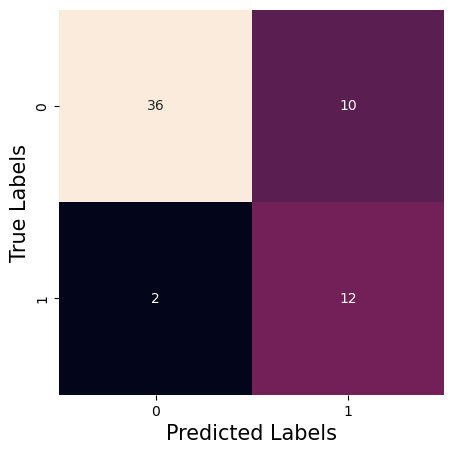

In [119]:
cm = confusion_matrix(LE_y_predict,ytest)
plt.figure(figsize=(10, 5))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

########## write something

## Decision Tree Classifier

In [100]:
TR = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2)

In [101]:
TR.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [102]:
TR.score(xtest,ytest)

0.8833333333333333

In [114]:
TR_y_predict = TR.predict(xtest)

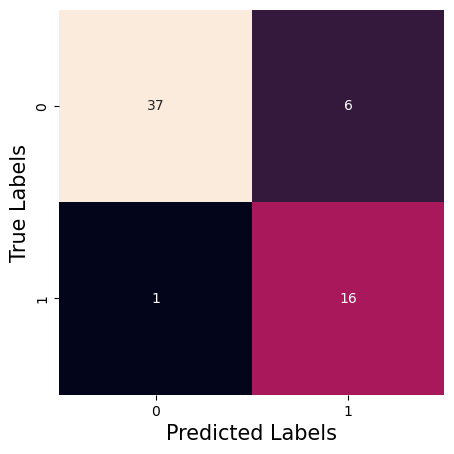

In [115]:
cm = confusion_matrix(TR_y_predict,ytest)
plt.figure(figsize=(10, 5))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

######### expalnantion

## Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
Rn = RandomForestClassifier()

In [105]:
Rn.fit(xtrain,ytrain)

RandomForestClassifier()

In [122]:
Rn.score(xtest,ytest)*100

90.0

I got maximum accuracy 90% using RandomForestClassifier

In [116]:
Rn_y_predict = Rn.predict(xtest)

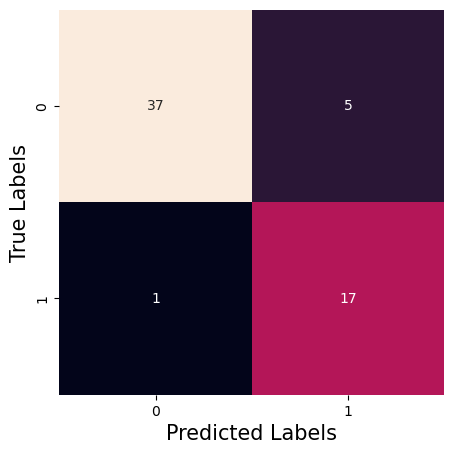

In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Rn_y_predict,ytest)
plt.figure(figsize=(10, 5))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

####### expalin a bit

# MODEL DEPLOYMENT AND MONITORING

Why u choose the model u will be using

In [124]:
input_data = (5,166,72,19,175,25.8,0.587,51,1,2,3,6)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Rn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person would have an heart attack')
else:
  print('The person would not have an heart attack')

[1]
The person would not have an heart attack


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [125]:
import pickle

In [127]:
filename = 'trained_model_heartfailure.sav'
pickle.dump(Rn, open(filename, 'wb'))

In [128]:
# loading the saved model
loaded_model = pickle.load(open('trained_model_heartfailure.sav', 'rb'))

In [129]:
def heartfailure_prediction(input_data):
    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = loaded_model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
        return 'The person would have an heart attack'
    else:
        return 'The person would not have an heart attack'

In [130]:
Billy_data = (5,166,72,19,175,25.8,0.587,51,1,2,9,6)

In [131]:
heartfailure_prediction(Billy_data)

[1]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'The person would not have an heart attack'